In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("08_gap-every-five-years.tsv", sep = '\t')
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


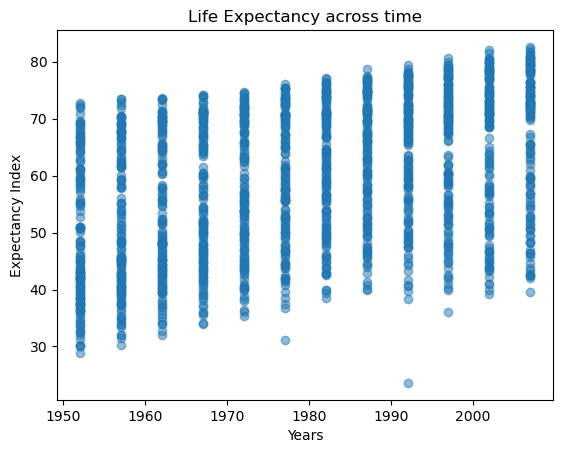

In [4]:
#Exercise 1:
fig, ax = plt.subplots()
plt.title('Life Expectancy across time')
plt.xlabel('Years')
plt.ylabel('Expectancy Index')
x = data['year']
y = data['lifeExp']
ax.scatter(x,y, alpha = 0.5 )
plt.show()

Question 1: Life expectancy over the years has a trend of increasing. It seems to be linearly increasing


<Axes: xlabel='year', ylabel='lifeExp'>

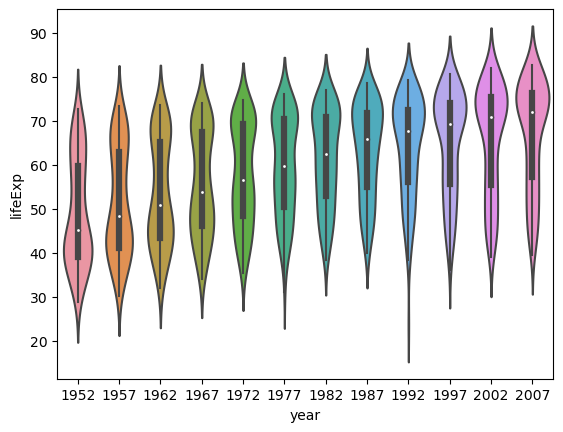

In [5]:
#violin plot
import seaborn as sns
sns.violinplot(data = data, x = "year", y = "lifeExp", split = True)


Question 2: 
The distribution is skewed, bimodal and assymetric from 1952. It changed into unimodal, negatively skewed but still assymetric by 2007. 

Question 3:
Yes, I will reject the null hypothesis of no relation between life expectancy and year. There is a correalation between the year and life expectancy. 

Question 4:
It should be linear as the current violin plot.

Question 5:
The violin plot should look like a normal distribution centered around 0 and symmetric.

In [6]:
#Exercise 2:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
model = LinearRegression()
xfit = [[x] for x in data["year"].values]
yfit = [[y] for y in data["lifeExp"].values]
fit = model.fit(xfit, yfit)
print('Intercept :', fit.intercept_)
print('slop :', fit.coef_)
print('coefficient of determination:', fit.score(xfit, yfit))
stat_model = ols(formula ="lifeExp ~ year", data = data).fit()
print(stat_model.summary())

Intercept : [-585.65218744]
slop : [[0.32590383]]
coefficient of determination: 0.18975713852188836
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           7.55e-80
Time:                        17:46:08   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Question 6:
On average, life expectancy increase 0.326 every year around the world.

Question 7:
Yes, because the probability of the null hypothesis p = 0. 

In [8]:
#Exercise 3:
intercept = stat_model.params.Intercept
slope = stat_model.params.year
data['residual'] = data['lifeExp']-(intercept + slope*data['year'])
data
    

,country,continent,year,lifeExp,pop,gdpPercap,residual
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-20.942161
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,0.432282
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,-3.171237
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,-18.368756
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,-26.818275


<Axes: xlabel='year', ylabel='residual'>

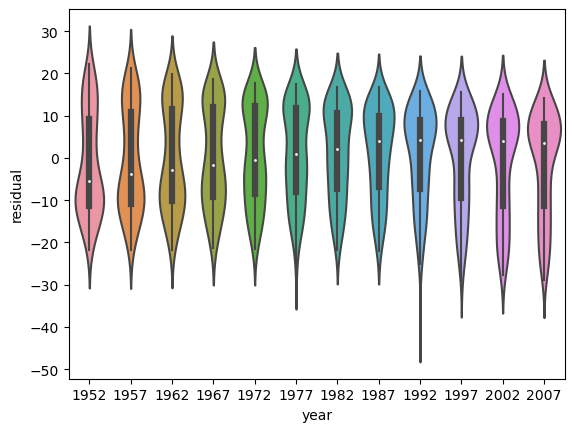

In [9]:
sns.violinplot(data = data, x = 'year', y = 'residual', split = True)

Question 8:
Yes, the graph is not nomarl distribution. It looks similar to the graph in exercise 1, skewed, asymmetric and multimodal.

<Axes: xlabel='continent', ylabel='residual'>

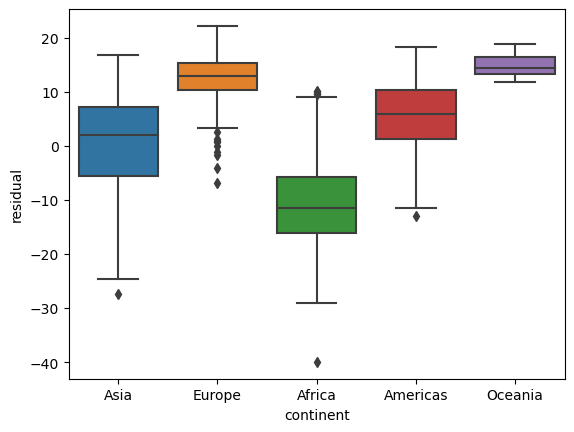

In [10]:
#Exercise 4:
sns.boxplot(data = data, x = 'continent', y = 'residual')

Question 9:
Yes, there is a dependence between model residual and continent. When performing a regression analysis of life expentancy across time,it suggests that the continents should be included to produce accurate results and explanation.

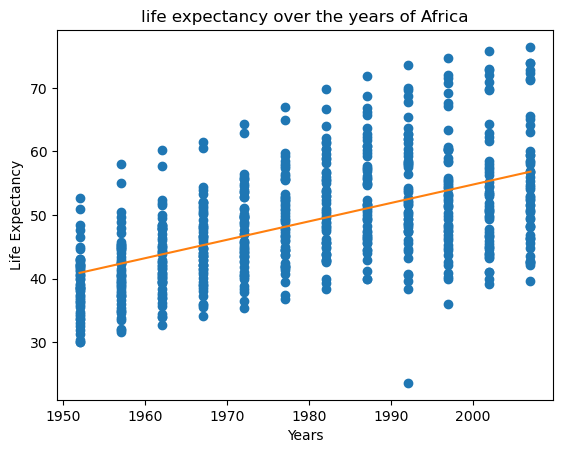

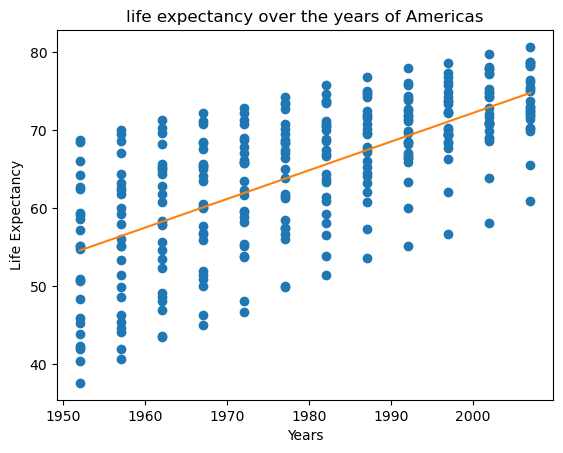

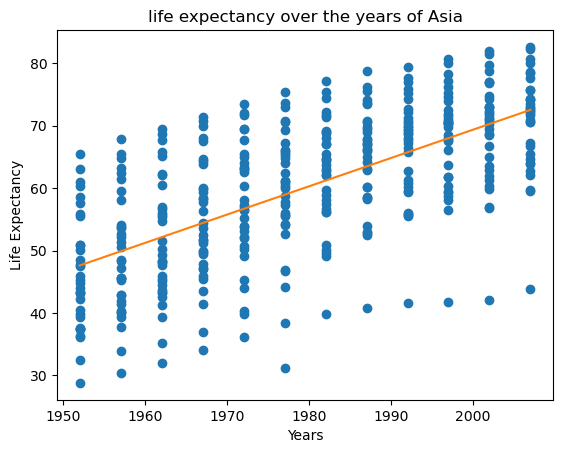

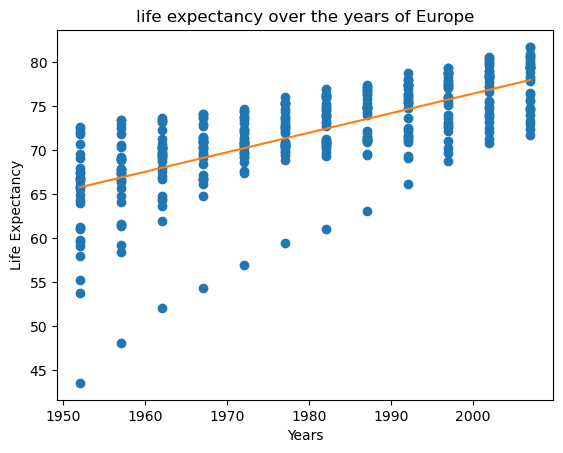

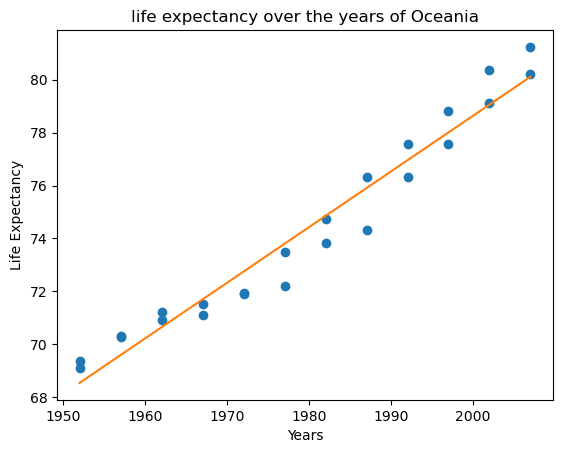

In [11]:
#exercise 5:
continents = np.unique(data['continent'])

for i in continents:
    c = data[data['continent'] == i]
    x = c['year']
    y = c['lifeExp']
    plt.title("life expectancy over the years of "+ i)
    plt.xlabel('Years')
    plt.ylabel('Life Expectancy')
    lin_regression = np.poly1d(np.polyfit(x, y, 1))
    hoz = np.linspace(x.min(), x.max(), 100)
    ver = lin_regression(hoz)
    plt.plot(x, y, 'o', hoz, ver)
    plt.show()


Question 10:
Yes, because each of the continents has different plot and regression line. It shows that each continent has impact on the life expectancy over the years.

In [12]:
#Exercise 6:
stat_model2 = ols(formula = 'lifeExp ~ year * continent', data = data).fit()
print(stat_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:46:25   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Question 11:
Most of them are significantly  different from 0. However, few of them, such as p value of Oceania that is 0.287 without interation and 0.36 with interation.

In [36]:
#Question 12:
stat_model2.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

Average increasing of life expectancy each year:
In Africa, its 0.2895
In America, its 0.0781
In Asia, its 0.1636
In Europe, its -0.0676
In Oceania, its -0.0793

In [13]:
#Exercise 7:
print("F value of model 1: ", stat_model.fvalue)
print("P value of model 1: ", stat_model.f_pvalue)

print("F value of model 2: ", stat_model2.fvalue)
print("P value of model 2: ", stat_model2.f_pvalue)

F value of model 1:  398.6047457117627
P value of model 1:  7.546794625596163e-80
F value of model 2:  424.2729023400697
P value of model 2:  0.0


Question 13:
The inteaction model is significantly better than the year only model because it has a significantly better F test score and p value

/tmp/ipykernel_111/608976292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_table['residual'] = 0
/tmp/ipykernel_111/608976292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_table['residual'][res_table['continent']== 'Africa'] = res_table['lifeExp'] - (itcept_Af + slope2_Af*res_table['year'])
/tmp/ipykernel_111/608976292.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

Text(0.5, 1.0, 'Residual vs year for Interaction model')

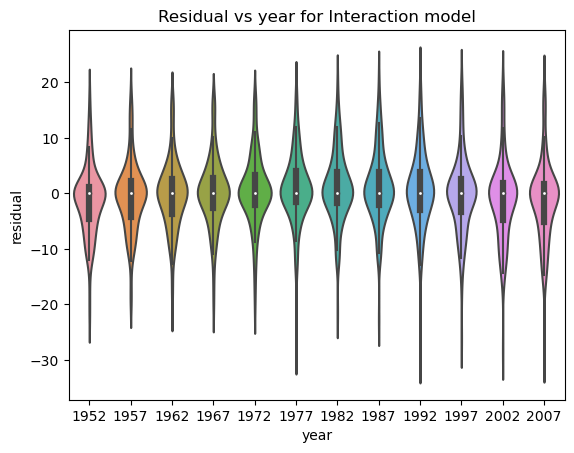

In [31]:
#exercise 8:
res_table = data[['country','continent', 'year', 'lifeExp']]
itcept_Af = stat_model2.params[0]
slope2_Af =  stat_model2.params[5]
res_table['residual'] = 0
res_table['residual'][res_table['continent']== 'Africa'] = res_table['lifeExp'] - (itcept_Af + slope2_Af*res_table['year'])

itcept_Am = itcept_Af+ stat_model2.params[1]
slope2_Am = slope2_Af + stat_model2.params[6]
res_table['residual'][res_table['continent'] == 'America'] = res_table['lifeExp'] - (itcept_Am + slope2_Am*res_table['year'])

itcept_As = itcept_Af + stat_model2.params[2]
slope2_As = slope2_Af+stat_model2.params[7]
res_table['residual'][res_table['continent'] == 'Asia'] = res_table['lifeExp'] - (itcept_As + slope2_As*res_table['year'])

itcept_Eu = itcept_Af + stat_model2.params[3]
slope2_Eu = slope2_Af + stat_model2.params[8]
res_table['residual'][res_table['continent'] == 'Europe']= res_table['lifeExp'] - (itcept_Eu + slope2_Eu*res_table['year'])

itcept_Oc = itcept_Af + stat_model2.params[4]
slope2_Oc = slope2_Af + stat_model2.params[9]
res_table['residual'][res_table['continent'] == 'Oceania'] = res_table['lifeExp'] - (itcept_Oc + slope2_Oc*res_table['year'])

sns.violinplot(x = 'year', y = 'residual', data =  res_table)
plt.title('Residual vs year for Interaction model')



In [32]:
res_table['pred_values'] = 0
res_table['pred_values'][res_table['continent'] == 'Africa'] = itcept_Af + slope2_Af*res_table['year']
res_table['pred_values'][res_table['continent'] == 'America'] = itcept_Am + slope2_Am*res_table['year']
res_table['pred_values'][res_table['continent'] == 'Asia'] = itcept_As + slope2_As*res_table['year']
res_table['pred_values'][res_table['continent'] == 'Europe'] = itcept_Eu + slope2_Eu*res_table['year']
res_table['pred_values'][res_table['continent'] == 'Oceania'] = itcept_Oc + slope2_Oc*res_table['year']
res_table

/tmp/ipykernel_111/308759910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_table['pred_values'] = 0
/tmp/ipykernel_111/308759910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_table['pred_values'][res_table['continent'] == 'Africa'] = itcept_Af + slope2_Af*res_table['year']
/tmp/ipykernel_111/308759910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_tab

,country,continent,year,lifeExp,residual,pred_values
0,Afghanistan,Asia,1952,28.801,-18.803037,47.604037
1,Afghanistan,Asia,1957,30.332,-19.537649,49.869649
2,Afghanistan,Asia,1962,31.997,-20.138261,52.135261
3,Afghanistan,Asia,1967,34.020,-20.380873,54.400873
4,Afghanistan,Asia,1972,36.088,-20.578485,56.666485
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,11.314200,51.036800
1700,Zimbabwe,Africa,1992,60.377,7.892554,52.484446
1701,Zimbabwe,Africa,1997,46.809,-7.123092,53.932092
1702,Zimbabwe,Africa,2002,39.989,-15.390739,55.379739


Text(0.5, 1.0, 'Residual and fitted values model')

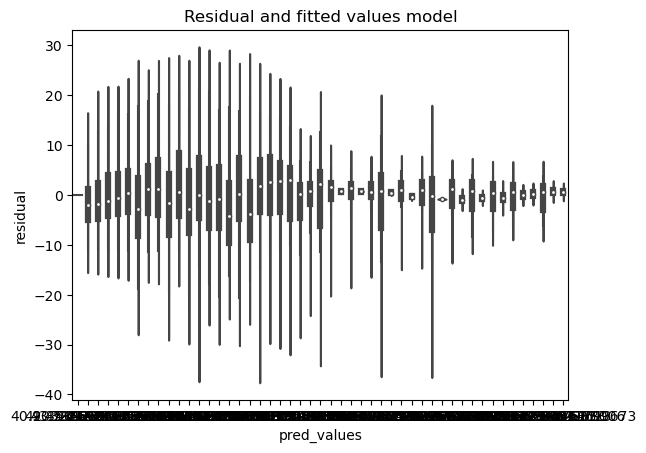

In [35]:
sns.violinplot(x = 'pred_values', y = 'residual', data = res_table)
plt.title('Residual and fitted values model')